Nama:

In [1]:
print("Rahman Aziz Firmansyah")

Rahman Aziz Firmansyah


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import random
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import MeanSquaredError as tf_mse

(A) Neural Network Classifier (Gunakan dataset titanic)

(1) Split X dan y. y adalah kolom 'Survived'. Split trainset dan testset: testsize:0.2, stratify:y.

In [4]:
titanic = pd.read_csv('titanic.csv').drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
y = titanic['Survived']
X = titanic.drop('Survived', axis=1)

In [6]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
#handling missing value
simple_imp_mode = SimpleImputer(strategy='most_frequent')
simple_imp_median = SimpleImputer(strategy='median')
X['Age'] = simple_imp_median.fit_transform(X[['Age']])
X['Embarked'] = simple_imp_mode.fit_transform(X[['Embarked']])
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

(2) Lakukan transformasi yang diperlukan pada trainset. Lakukan transformasi serupa pada testset tanpa fitting ulang.

In [9]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
320,3,male,22.0,0,0,7.2500,S
210,3,male,24.0,0,0,7.0500,S
523,1,female,44.0,0,1,57.9792,C
482,3,male,50.0,0,0,8.0500,S
368,3,female,28.0,0,0,7.7500,Q


In [10]:
#memisahkan fitur numerik dan kategorik pada X_train
X_train_num = X_train.select_dtypes('number')
X_train_obj = X_train.select_dtypes('object')

In [21]:
#melakukan ordinal encoding untuk fitur kategorik
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_obj_encoded = pd.DataFrame(ohe.fit_transform(X_train_obj).toarray(), 
                                   columns=ohe.get_feature_names_out(X_train_obj.columns))
X_train_obj_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0


In [22]:
#scaling fitur numerik dengan minmax scaler
minmax = MinMaxScaler()
X_train_num_scaled = pd.DataFrame(minmax.fit_transform(X_train_num), columns=minmax.feature_names_in_)
X_train_num_scaled.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.268877,0.0,0.0,0.014151
1,1.0,0.294088,0.0,0.0,0.013761
2,0.0,0.546199,0.0,0.2,0.113168
3,1.0,0.621833,0.0,0.0,0.015713
4,1.0,0.344510,0.0,0.0,0.015127


In [24]:
#transformasi testing set
X_test_num = X_test.select_dtypes('number')
X_test_obj = X_test.select_dtypes('object')

In [25]:
X_test_num_scaled = pd.DataFrame(minmax.transform(X_test_num), columns=minmax.feature_names_in_)
X_test_num_scaled.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.130216,0.5,0.4,0.061045
1,1.0,0.344510,0.0,0.0,0.110272
2,1.0,0.344510,0.0,0.0,0.110272
3,1.0,0.016765,0.5,0.2,0.056848
4,0.5,0.508383,0.0,0.2,0.038061


In [26]:
X_test_obj_encoded = pd.DataFrame(ohe.transform(X_test_obj).toarray(), columns=ohe.get_feature_names_out(X_test_obj.columns))
X_test_obj_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


In [27]:
#menggabungkan kembali training set dan testing set
X_train_transformed = pd.concat([X_train_num_scaled, X_train_obj_encoded], axis=1)
X_test_transformed = pd.concat([X_test_num_scaled, X_test_obj_encoded], axis=1)

(3) Buat model neural network sebagai model klasifikasi. Tentukan jumlah lapisan hidden layer, jumlah  neuron pada hidden layer, regularisasi (batch normalization/dropout) optimal, dan jumlah epoch dengan cara trial and error (coba beberapa model, pilih yang hasilnya terbaik).

In [28]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

neural2 = Sequential()

neural2.add(Dense(100, activation = 'relu', input_dim=X_train_transformed.shape[1]))
neural2.add(BatchNormalization())
neural2.add(Dropout(0.3))
neural2.add(Dense(50, activation = 'relu'))
neural2.add(BatchNormalization())
neural2.add(Dropout(0.2))
neural2.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(0.001)

neural2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')

neural2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

In [29]:
history = neural2.fit(X_train_transformed, y_train, validation_split=0.25, epochs = 74, batch_size = 50, verbose=1) 

Epoch 1/74
11/11 [==============================] - 3s 53ms/step - loss: 0.7021 - accuracy: 0.6742 - val_loss: 0.6087 - val_accuracy: 0.6742
Epoch 2/74
11/11 [==============================] - 0s 12ms/step - loss: 0.5291 - accuracy: 0.7715 - val_loss: 0.5987 - val_accuracy: 0.6966
Epoch 3/74
11/11 [==============================] - 0s 12ms/step - loss: 0.5161 - accuracy: 0.7790 - val_loss: 0.5954 - val_accuracy: 0.7079
Epoch 4/74
11/11 [==============================] - 0s 17ms/step - loss: 0.4967 - accuracy: 0.7790 - val_loss: 0.5894 - val_accuracy: 0.7360
Epoch 5/74
11/11 [==============================] - 0s 11ms/step - loss: 0.4512 - accuracy: 0.8034 - val_loss: 0.5860 - val_accuracy: 0.7360
Epoch 6/74
11/11 [==============================] - 0s 10ms/step - loss: 0.4629 - accuracy: 0.8184 - val_loss: 0.5816 - val_accuracy: 0.7472
Epoch 7/74
11/11 [==============================] - 0s 12ms/step - loss: 0.4770 - accuracy: 0.7884 - val_loss: 0.5759 - val_accuracy: 0.7528
Epoch 8/74
11

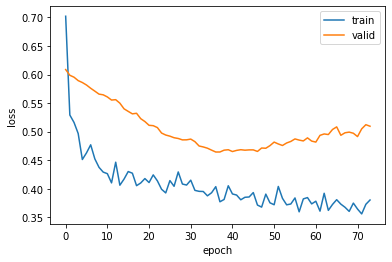

In [30]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch

sns.lineplot(data = history_df, x='epoch', y='loss', label='train')
sns.lineplot(data = history_df, x='epoch', y='val_loss', label='valid')
plt.show()

(4) Tentukan optimal  probability threshold untuk label 1.

In [35]:
print(classification_report(y_train, neural2.predict(X_train_transformed) > 0.35, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.76      0.81      0.79       273
           0       0.88      0.85      0.86       439

    accuracy                           0.83       712
   macro avg       0.82      0.83      0.82       712
weighted avg       0.83      0.83      0.83       712



In [36]:
print(classification_report(y_test, neural2.predict(X_test_transformed) > 0.35, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.68      0.75      0.72        69
           0       0.83      0.78      0.81       110

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



(5) Print classification report dari model neural network yang telah Anda buat (train set vs test set).

(B) Neural Network Regressor (Gunakan dataset boston)

(1) Split X dan y. y adalah kolom 'MEDV'. Split trainset dan testset: testsize:0.2.

In [37]:
boston = pd.read_csv('Boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [38]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [39]:
y = boston['MEDV']
X = boston.drop('MEDV', axis=1)

In [40]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

(2) Lakukan transformasi yang diperlukan pada trainset. Lakukan transformasi serupa pada testset tanpa fitting ulang.

In [41]:
X2_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,11.28


In [42]:
#scaling dengan minmax scaler
X2_train_scaled = pd.DataFrame(minmax.fit_transform(X2_train), columns=minmax.feature_names_in_)
X2_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.263521


In [43]:
X2_test_scaled = pd.DataFrame(minmax.transform(X2_test), columns=minmax.feature_names_in_)
X2_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.000930,0.0,0.122593,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.201711
1,0.000533,0.4,0.210000,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,0.049669
2,0.001087,0.0,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.450883
3,0.000928,0.0,0.372963,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.104581
4,0.057112,0.0,0.642963,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.428808


(3) Buat model neural network sebagai model regresi. Tentukan jumlah lapisan hidden layer, jumlah  neuron pada hidden layer, regularisasi (batch normalization/dropout) optimal, dan jumlah epoch dengan cara trial and error (coba beberapa model, pilih yang hasilnya terbaik).

In [44]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

neural3 = Sequential()

neural3.add(Dense(100, activation = 'relu', input_dim=X2_train_scaled.shape[1]))
neural3.add(BatchNormalization())
neural3.add(Dropout(0.3))
neural3.add(Dense(50, activation = 'relu'))
neural3.add(BatchNormalization())
neural3.add(Dropout(0.2))
neural3.add(Dense(1, activation = 'linear'))

optimizer = tf.keras.optimizers.Adam(0.001)

neural3.compile(optimizer=optimizer, loss=tf_mse())

neural3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

In [45]:
history = neural3.fit(X2_train_scaled, y_train, validation_split=0.25, epochs = 100, batch_size = 50, verbose=1) 

Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 2.4502 - val_loss: 0.4127
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 1.6987 - val_loss: 0.3617
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 1.3091 - val_loss: 0.3158
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 1.3107 - val_loss: 0.2783
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 1.1582 - val_loss: 0.2536
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 1.1371 - val_loss: 0.2411
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 1.0553 - val_loss: 0.2377
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 1.1500 - val_loss: 0.2430
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.8785 - val_loss: 0.2488
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 1.1143 - val_loss: 0.2549
Epoch 11/100
7/7 [=======

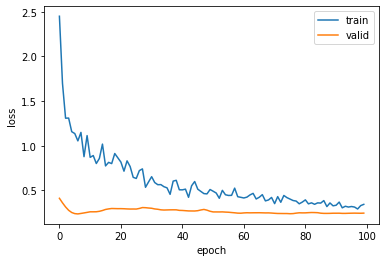

In [46]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch

sns.lineplot(data = history_df, x='epoch', y='loss', label='train')
sns.lineplot(data = history_df, x='epoch', y='val_loss', label='valid')

(4) Print R2, MSE, RMSE, MAE dari model neural network yang telah Anda buat (train set vs test set) dalam bentuk dataframe.

In [47]:
def regres2(x, y, estimator_list, label_list):
    r2_list = []
    mse_list = []
    rmse_list = []
    mape_list = []
    mae_list = []
    for estimator in estimator_list:
        y_pred = estimator.predict(x)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = mse ** (1/2)
        mae = mean_absolute_error(y, y_pred)
        mape = mean_absolute_percentage_error(y, y_pred)
        
        r2_list.append(r2)
        mse_list.append(mse)
        rmse_list.append(rmse)
        mape_list.append(mape)
        mae_list.append(mae)
        
    perf_df = pd.DataFrame({'r2':r2_list, 'mse':mse_list, 'rmse':rmse_list, 'mape':mape_list, 'mae':mae_list}, 
                           index=label_list)
    return perf_df

In [48]:
regres2(X2_train_scaled, y2_train, [neural3], ['neural_reg'])

,r2,mse,rmse,mape,mae
neural_reg,-5.777274,588.764841,24.264477,0.981892,22.423071


In [49]:
regres2(X2_test_scaled, y2_test, [neural3], ['neural_reg'])

,r2,mse,rmse,mape,mae
neural_reg,-6.083274,519.443314,22.791299,0.98259,21.142066
